## Exercise 1: MSE Scikit-learn

In [1]:
from sklearn.metrics import mean_squared_error

In [2]:
y_true = [20, 25, 30]
y_pred = [22, 24, 29]

In [3]:
mse = mean_squared_error(y_true, y_pred)

In [4]:
print (mse)

2.0


## Exercise 2: Accuracy Scikit-learn

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
acscore = accuracy_score(y_true, y_pred)

In [7]:
print (acscore)

0.0


## Exercise 3: Regression

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [9]:
housing = fetch_california_housing()
X, y = housing['data'], housing['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=13
)
pipeline = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]
pipe = Pipeline(pipeline)

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

In [11]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [12]:
print("First 10 train predictions:", y_train_pred[:10])
print("First 10 test predictions:", y_test_pred[:10])

First 10 train predictions: [1.54505951 2.21338527 2.2636205  3.3258957  1.51710076 1.63209319
 2.9265211  0.78080924 1.21968217 0.72656239]
First 10 test predictions: [ 1.82212706  1.98357668  0.80547979 -0.19259114  1.76072418  3.27855815
  2.12056804  1.96099917  2.38239663  1.21005304]


In [13]:
print("r2 on the train set:", r2_score(y_train, y_train_pred))
print("MAE on the train set:", mean_absolute_error(y_train, y_train_pred))
print("MSE on the train set:", mean_squared_error(y_train, y_train_pred))

r2 on the train set: 0.6079874818809449
MAE on the train set: 0.5300159371615256
MSE on the train set: 0.5210784446797678


In [14]:
print("r2 on the test set:", r2_score(y_test, y_test_pred))
print("MAE on the test set:", mean_absolute_error(y_test, y_test_pred))
print("MSE on the test set:", mean_squared_error(y_test, y_test_pred))

r2 on the test set: 0.5903435927516574
MAE on the test set: 0.5454023699809112
MSE on the test set: 0.5537420654727397


## Exercise 4: Classification

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

In [16]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=43)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)
y_train_proba = classifier.predict_proba(X_train_scaled)[:, 1]
y_test_proba = classifier.predict_proba(X_test_scaled)[:, 1]

In [19]:
print("First 10 train predictions:", y_train_pred[:10])
print("First 10 test predictions:", y_test_pred[:10])

First 10 train predictions: [1 0 1 1 1 0 0 1 1 0]
First 10 test predictions: [1 1 0 0 0 1 1 1 0 0]


In [20]:
print("F1 on the train set: ", f1_score(y_train, y_train_pred))
print("Accuracy on the train set: ", accuracy_score(y_train, y_train_pred))
print("Recall on the train set: ", recall_score(y_train, y_train_pred))
print("Precision on the train set: ", precision_score(y_train, y_train_pred))
print("ROC_AUC on the train set: ", roc_auc_score(y_train, y_train_proba))

F1 on the train set:  0.9911504424778761
Accuracy on the train set:  0.989010989010989
Recall on the train set:  0.9929078014184397
Precision on the train set:  0.9893992932862191
ROC_AUC on the train set:  0.998995613495675


In [21]:
print("\nF1 on the test set: ", f1_score(y_test, y_test_pred))
print("Accuracy on the test set: ", accuracy_score(y_test, y_test_pred))
print("Recall on the test set: ", recall_score(y_test, y_test_pred))
print("Precision on the test set: ", precision_score(y_test, y_test_pred))
print("ROC_AUC on the test set: ", roc_auc_score(y_test, y_test_proba))


F1 on the test set:  0.9801324503311258
Accuracy on the test set:  0.9736842105263158
Recall on the test set:  0.9866666666666667
Precision on the test set:  0.9736842105263158
ROC_AUC on the test set:  0.9863247863247864


In [22]:
print("\nConfusion matrix (test set):")
print(confusion_matrix(y_test, y_test_pred))


Confusion matrix (test set):
[[37  2]
 [ 1 74]]


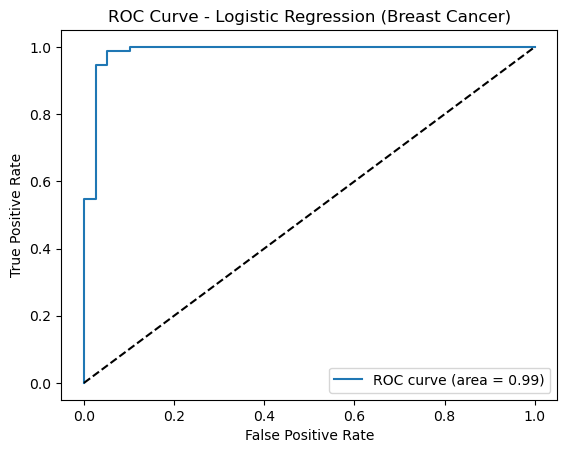

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_test_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Breast Cancer)")
plt.legend(loc="lower right")
plt.show()

## Exercise 5: Machine Learning models

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
housing = fetch_california_housing()
X, y = housing['data'], housing['target']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=43
)


In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=43),
    "Random Forest": RandomForestRegressor(random_state=43),
    "Gradient Boosting": GradientBoostingRegressor(random_state=43)
}

In [28]:
for name, model in models.items():
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    print(f"\n{name}:")
    print("  Train R2:", r2_score(y_train, y_train_pred))
    print("  Train MSE:", mean_squared_error(y_train, y_train_pred))
    print("  Train MAE:", mean_absolute_error(y_train, y_train_pred))
    print("  Test R2:", r2_score(y_test, y_test_pred))
    print("  Test MSE:", mean_squared_error(y_test, y_test_pred))
    print("  Test MAE:", mean_absolute_error(y_test, y_test_pred))


Linear Regression:
  Train R2: 0.6054131599242079
  Train MSE: 0.5273648371379568
  Train MAE: 0.5330920012614552
  Test R2: 0.6128959462132963
  Test MSE: 0.49761195027083815
  Test MAE: 0.5196420310323714

SVM:
  Train R2: 0.749610858293664
  Train MSE: 0.33464478671339165
  Train MAE: 0.38356451633259875
  Test R2: 0.7295080649899686
  Test MSE: 0.3477101776543003
  Test MAE: 0.3897680598426786

Decision Tree:
  Train R2: 1.0
  Train MSE: 9.24499456646287e-32
  Train MAE: 4.221907539810565e-17
  Test R2: 0.6228217144931267
  Test MSE: 0.4848526395290697
  Test MAE: 0.4403051356589147

Random Forest:
  Train R2: 0.9741263135396302
  Train MSE: 0.03458015083247723
  Train MAE: 0.12000198560508221
  Test R2: 0.8119778189909694
  Test MSE: 0.24169750554364758
  Test MAE: 0.3194169859011629

Gradient Boosting:
  Train R2: 0.8042086499063386
  Train MSE: 0.26167490389525294
  Train MAE: 0.35656543036682264
  Test R2: 0.7895081234643192
  Test MSE: 0.27058170064218096
  Test MAE: 0.364554

## Exercise 6: Grid Search

In [30]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [31]:
housing = fetch_california_housing()
X, y = housing['data'], housing['target']

In [32]:
parameters = {
    'n_estimators': [10, 50, 75],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [10, 20, 30]
}

In [33]:
rf = RandomForestRegressor()
gridsearch = GridSearchCV(
    rf,
    parameters,
    cv=[(np.arange(18576), np.arange(18576, 20640))],
    n_jobs=-1
)
gridsearch.fit(X, y)

GridSearchCV(cv=[(array([    0,     1,     2, ..., 18573, 18574, 18575]),
                  array([18576, 18577, 18578, ..., 20637, 20638, 20639]))],
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [10, 50, 75]})

In [34]:
rf = RandomForestRegressor()
gridsearch = GridSearchCV(
    rf,
    parameters,
    cv=[(np.arange(18576), np.arange(18576, 20640))],
    n_jobs=-1
)
gridsearch.fit(X, y)

GridSearchCV(cv=[(array([    0,     1,     2, ..., 18573, 18574, 18575]),
                  array([18576, 18577, 18578, ..., 20637, 20638, 20639]))],
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [10, 50, 75]})

In [37]:
def select_model_verbose(gs):
    return gs.best_estimator_, gs.best_params_, gs.best_score_


In [38]:
model, best_params, best_score = select_model_verbose(gridsearch)
new_point = np.array([[3.2031, 52., 5.47761194, 1.07960199, 910., 2.26368159, 37.85, -122.26]])
prediction = model.predict(new_point)
print("Best parameters:", best_params)
print("Best score:", best_score)
print("Prediction for new point:", prediction)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'n_estimators': 75}
Best score: 0.6307235549684828
Prediction for new point: [2.60999089]
